### *Este notebook es para la tarea que se entrega el 24 de Febrero, en el siguiente notebook se utilizan diferentes tecnicas para hacer exploratory analysis y preprocesamiento de los datos, al final implementamos un modelo predictivo con un dataset de kaggle para clasificacion binaria*

El notebook contiene todos los experimentos para un SVM en el dataset de pima indians para clasificacion de diabetes tipo 2:
- EDA
- Preprocessing
- Pipeline and Models 
- Hiperparameter tuning
- Results

# **EDA**


Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Hacemos todos los imports
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
import optuna
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif


In [11]:
# Hacemos todos los imports
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif


In [12]:
# Cargamos el datasets pima indian diabetes que ya esta en el repo 
# Y empezamos a hacer un EDA para ver las columnas

dataset = pd.read_csv("datasets/diabetes.csv")

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# Utilizamos describe para mirar los valores avg de las columnas
# E ir pintando el panorama del dataset

dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
# Primero definimos el subset X y Y porque si no no podemos graficar
# Ya que no hay variables X ni variable target

y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis=1)

In [17]:
# Las columnas que despues utilizaremos para predicciones

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
# La columna que utilizaremos para el outcome como Y val y Y train

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

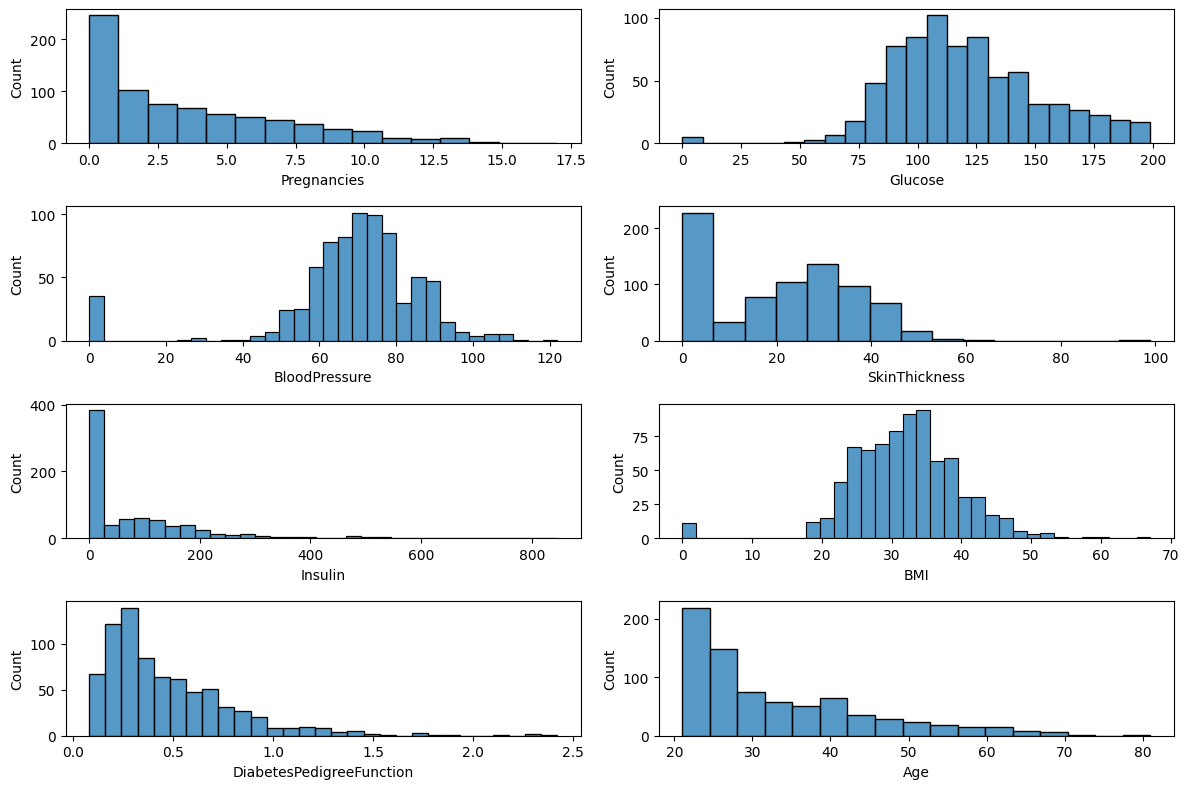

In [19]:
# Graficamos varios histoplots para poder ver si existen outliers

fig, ax = plt.subplots(4,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), X.columns):
    sns.histplot(X[col], ax=ax)

fig.tight_layout()

Definitivamente hay outliers, en Pregnancies, Insulin, Skin Thickness, un poco de age y glucosa en el lower bound 

<Axes: xlabel='Outcome', ylabel='Count'>

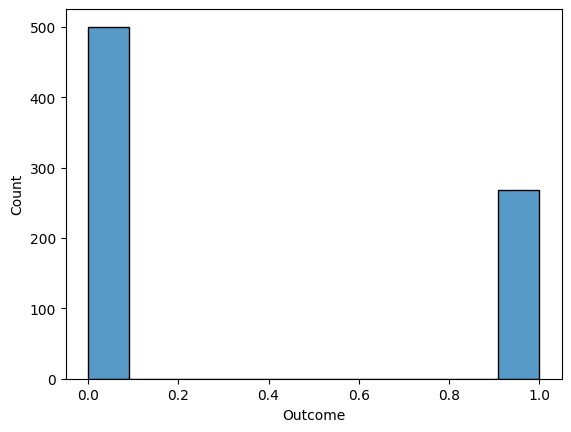

In [20]:
# Graficamos el outcome para darnos una idea 
# de que tan sampleadas estan las 2 clases

sns.histplot(y)

Tenemos un poco de desbalance en el porcentaje de clases del outcome 

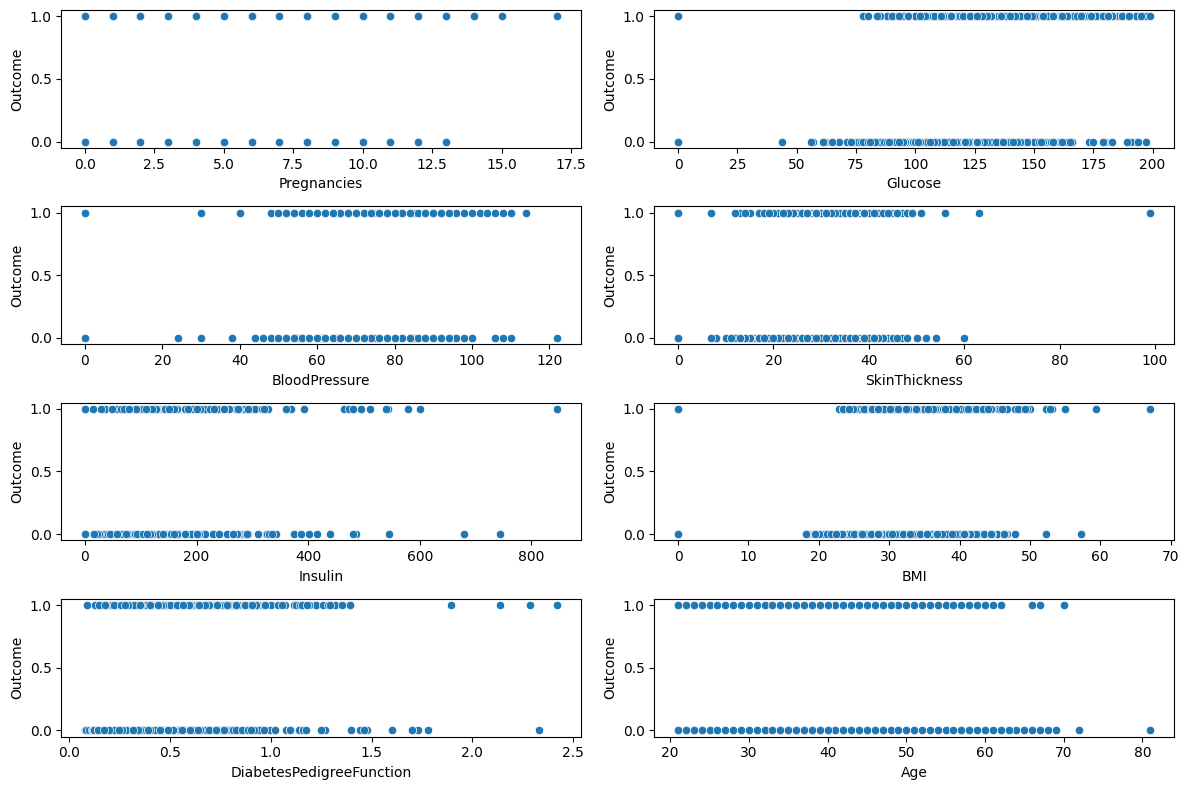

In [21]:
# Grafico un scatterplot para poder identificar los outliers en base
# A la columna target

fig, ax = plt.subplots(4,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), X.columns):
    sns.scatterplot(x= X[col], y=y, ax=ax)

fig.tight_layout()

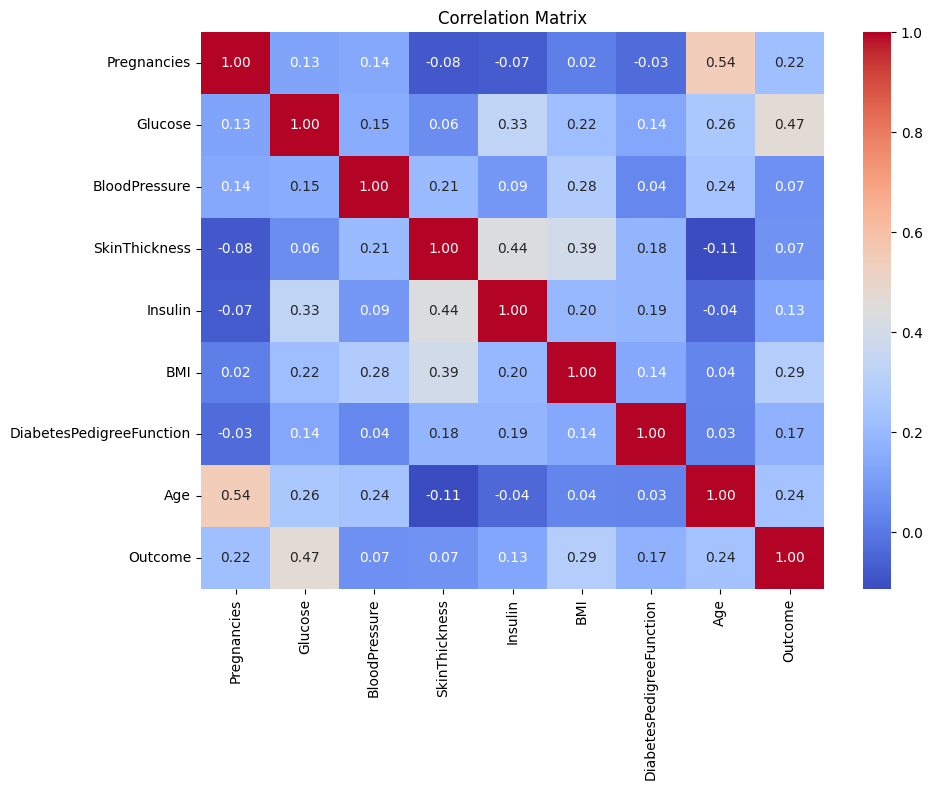

In [22]:
# Creamos una matriz de correlacion para poder ver la correlacion de los features con el outcome

corr = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [23]:
dataset.corr()["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Despues de correr las visualizaciones de correlacion, tenemos ciertos features como Skin Thickness y blood pressure que de plano no tienen mucho que ver con el Outcome pero lo vamos a handlear despues primero removeremos Outliers

In [24]:
# Contamos todas las columnas que tengan un 0 ya que para nuestro estudio solo pregnancies y outcome deberia tener 0

(dataset == 0).sum().sort_values(ascending=False)

Outcome                     500
Insulin                     374
SkinThickness               227
Pregnancies                 111
BloodPressure                35
BMI                          11
Glucose                       5
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

A parte de que tenemos outliers, tambien tenemos muchos valores con 0 en columnas que no deberia de tener 0, por ejemplo no tiene sentido tener 0 en: Insulina, SkinThickness, BloodPressure, glucosa o BMI, y aunque estas filas seguramente se van a quitar cuando quitemos los outliers tenemos que hacer un double check despues de removerlos

# **Preprocessing**

Lo que vamos a proceder con estos experimentos es hacer un ablation study, con los mismos modelos pero con 8 features y 4 features para ver si una SVC no lineal o quantum kernel puede mejorar con mas features pero midiendo tradeoffs con el costo computacional y tiempo de procesamiento en los simuladores. Tambien funcionara para ver que kernel es mejor para cada situacion, uno cuantico o uno clasico.

split → imputar → outliers → balancear → CV


Primero spliteamos el dataset de manera estratificada 80, 20, en el mismo 80 de train usaremos CV para testear y el 20 final es un subset de validacion que no se toca hasta el final

In [25]:
# Spliteamos de manera estratificada tomando en cuenta las 8 features

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Despues vamos a handlear los valores que son 0, primero los recordaremos como NaN y despues los fillearemos con la mediana respectivamente, si filleamos train usamos mediana train, si filleamos test usamos mediana test, para evitar data leakage sin querer

In [26]:
# Ponemos los valores de 0 como NaN en las columnas que NO pueden existir 0s logicos

cols_nozeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

X_train[cols_nozeros] = X_train[cols_nozeros].replace(0, np.nan)
X_val[cols_nozeros] = X_val[cols_nozeros].replace(0, np.nan)

In [27]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90.0,62.0,12.0,43.0,27.2,0.580,24
711,5,126.0,78.0,27.0,22.0,29.6,0.439,40
373,2,105.0,58.0,40.0,94.0,34.9,0.225,25
46,1,146.0,56.0,NaN,NaN,29.7,0.564,29
682,0,95.0,64.0,39.0,105.0,44.6,0.366,22


In [28]:
X_val.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7,159.0,64.0,NaN,NaN,27.4,0.294,40
672,10,68.0,106.0,23.0,49.0,35.5,0.285,47
700,2,122.0,76.0,27.0,200.0,35.9,0.483,26
630,7,114.0,64.0,NaN,NaN,27.4,0.732,34
81,2,74.0,NaN,NaN,NaN,NaN,0.102,22


Despues de tener NaNs en vez de 0s en los features que no puede existir 0s, ahora los imputamos con la mediana de su split respectivamente

In [29]:
# Vamos a fitear el imputer en X train y X val, despues dejaremos de usar esas y usaremos las variables nuevas

imputer = SimpleImputer(strategy='median')

X_train_imputer = pd.DataFrame(
    imputer.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_val_imputer = pd.DataFrame(
    imputer.transform(X_val),
    columns = X_val.columns,
    index= X_val.index
)

In [30]:
X_train_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1.0,90.0,62.0,12.0,43.0,27.2,0.580,24.0
711,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0
373,2.0,105.0,58.0,40.0,94.0,34.9,0.225,25.0
46,1.0,146.0,56.0,29.0,125.0,29.7,0.564,29.0
682,0.0,95.0,64.0,39.0,105.0,44.6,0.366,22.0


In [31]:
X_val_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
44,7.0,159.0,64.0,29.0,125.0,27.4,0.294,40.0
672,10.0,68.0,106.0,23.0,49.0,35.5,0.285,47.0
700,2.0,122.0,76.0,27.0,200.0,35.9,0.483,26.0
630,7.0,114.0,64.0,29.0,125.0,27.4,0.732,34.0
81,2.0,74.0,72.0,29.0,125.0,32.4,0.102,22.0


Despues de tener ahora si el dataset imputado con la mediana y las nuevas variables listas, vamos a quitar outliers 

In [32]:
X_train_imputer.describe().loc[["min","max","mean","std"]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0.000000,56.000000,24.000000,7.000000,15.000000,18.200000,0.084000,21.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,81.000000
mean,3.819218,121.671010,72.140065,29.042345,137.705212,32.448208,0.477428,33.366450
std,3.314148,30.003794,12.275119,8.891855,78.764767,6.824122,0.330300,11.833438


Como si seguimos teniendo outliers, lo que vamos a hacer es que los clipearemos por pipeline, primero quitaremos outliers para el set de 8 features y despues para el de 4, solo por el sentido del ablation study y pipelines diferentes pero en realidad no afecta si clipeas, si los removiera entonces si afectaria.

Vamos a decidir que features elegir usando MI para patrones no lineares y Corr para la correlacion y patrones lineales. Solo en train para no tener data leakage o hacer trampa

In [33]:
# Primero vamos a usar MI y Correlation para decidir con que features quedarnos de las 8: 

mi = mutual_info_classif(X_train_imputer, y_train, random_state=42)
mi_scores = pd.Series(mi, index=X_train_imputer.columns).sort_values(ascending=False)
print(mi_scores)

top4 = mi_scores.head(4).index.tolist()
print("Top-4 por MI:", top4)


Glucose                     0.117706
BMI                         0.093590
Age                         0.062202
Insulin                     0.043321
Pregnancies                 0.038053
SkinThickness               0.033670
BloodPressure               0.020999
DiabetesPedigreeFunction    0.006189
dtype: float64
Top-4 por MI: ['Glucose', 'BMI', 'Age', 'Insulin']


In [34]:
import pandas as pd

# Une X_train (ya imputado) con y_train para poder correlacionar con Outcome
train_df = X_train_imputer.copy()
train_df["Outcome"] = y_train.values

corr_scores = train_df.corr(numeric_only=True)["Outcome"].sort_values(ascending=False)
print(corr_scores)


Outcome                     1.000000
Glucose                     0.512291
BMI                         0.328774
Insulin                     0.245902
Age                         0.240676
SkinThickness               0.234260
Pregnancies                 0.208173
BloodPressure               0.183373
DiabetesPedigreeFunction    0.165312
Name: Outcome, dtype: float64


Despues de mirar que features realmente se repiten en las 2 metricas nos quedaremos con: 
- Glucose
- BMI
- Insulin
- Age

In [35]:
# Quitaremos esos para solo quedarnos con 4 importantes para no sufrir en hardware real o simulador con tanto qubit.
# Aunque el SVM puede crear relaciones no lineales, por eso tenemos 2 sets

sel4 = ["Glucose", "BMI", "Age", "Insulin"]

X_train_4f = X_train_imputer[sel4].copy()
X_val_4f = X_val_imputer[sel4].copy()

X_train_4f.head()

,Glucose,BMI,Age,Insulin
353,90.0,27.2,24.0,43.0
711,126.0,29.6,40.0,22.0
373,105.0,34.9,25.0,94.0
46,146.0,29.7,29.0,125.0
682,95.0,44.6,22.0,105.0


In [36]:
X_val_4f.head()

,Glucose,BMI,Age,Insulin
44,159.0,27.4,40.0,125.0
672,68.0,35.5,47.0,49.0
700,122.0,35.9,26.0,200.0
630,114.0,27.4,34.0,125.0
81,74.0,32.4,22.0,125.0


Ahora si teniendo los sets imputados, 80-20 y de 4 y 8 features, solo falta hacerle outlier handling

In [37]:
# --- 4 FEATURES: fit bounds on train_4f, apply to train_4f and val_4f ---
Q1_4 = X_train_4f.quantile(0.25)
Q3_4 = X_train_4f.quantile(0.75)
IQR_4 = Q3_4 - Q1_4

X_train_4f_capped = X_train_4f.copy()
X_val_4f_capped   = X_val_4f.copy()

for col in X_train_4f.columns:
    lower = Q1_4[col] - 1.5 * IQR_4[col]
    upper = Q3_4[col] + 1.5 * IQR_4[col]
    X_train_4f_capped[col] = X_train_4f_capped[col].clip(lower=lower, upper=upper)
    X_val_4f_capped[col]   = X_val_4f_capped[col].clip(lower=lower, upper=upper)

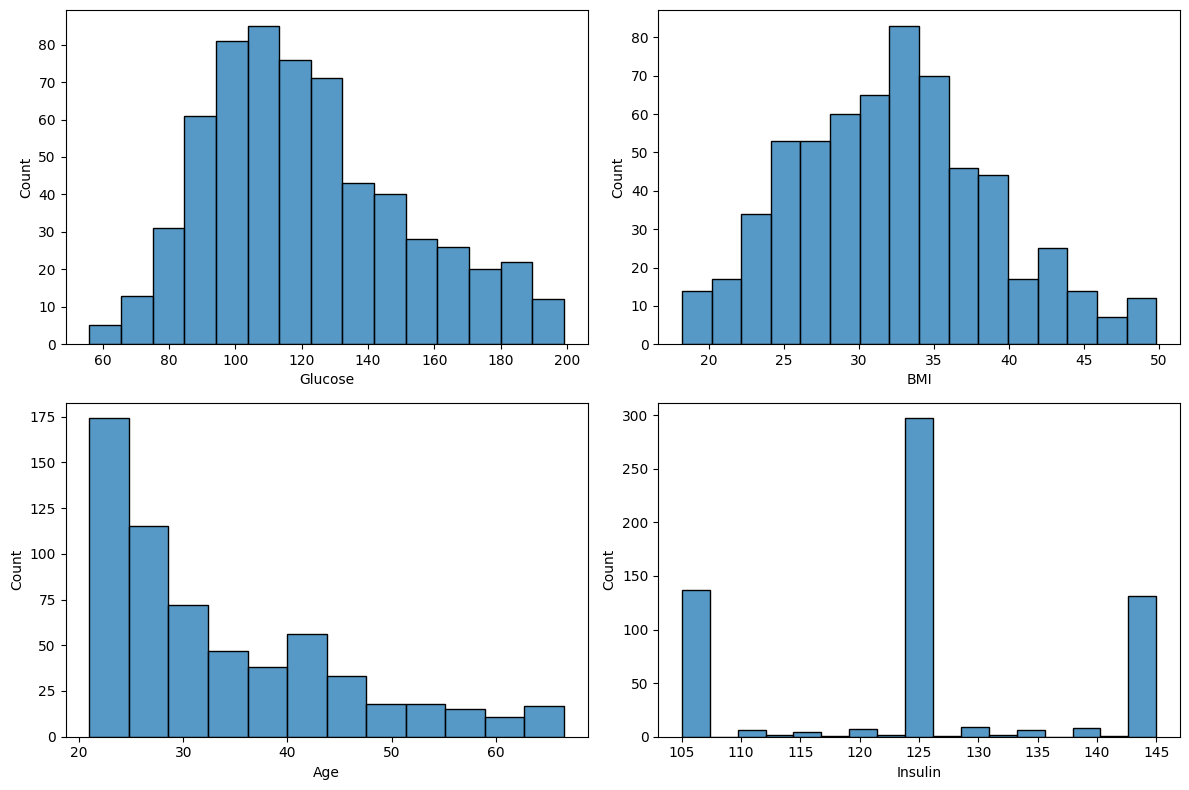

In [38]:
# Graficamos varios histoplots para ver si si quitamos los  outliers para el set 4 features

fig, ax = plt.subplots(2,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), X_train_4f_capped.columns):
    sns.histplot(X_train_4f_capped[col], ax=ax)

fig.tight_layout()

In [39]:
X_train_4f_capped.describe().loc[["count","min","max","mean",]]

,Glucose,BMI,Age,Insulin
count,614.00000,614.000000,614.000000,614.000000
min,56.00000,18.200000,21.000000,105.000000
max,199.00000,49.812500,66.500000,145.000000
mean,121.67101,32.384507,33.319218,124.912052


In [40]:
X_val_4f_capped.describe().loc[["count","min","max","mean",]]

,Glucose,BMI,Age,Insulin
count,154.000000,154.000000,154.000000,154.000000
min,44.000000,18.200000,21.000000,105.000000
max,197.000000,49.812500,66.500000,145.000000
mean,121.597403,32.411851,32.724026,125.168831


- **614 registros Train**
- **154 registros Validacion final**

- **768 registros en total**, 
[ Sigo teniendo la distribucion del principio ya que impute en vez de tirar las columnas con 0 y los outliers los clipie en vez de quitarlos ] 

Definitivamente se ve todo mejor y ya no existen outliers o al menos outliers tan fuertes como 800 de insulina

Ahora solo queda hacer los sets en 50/50 en base a el target column

No se aplica el downsample de 50/50 al set de val solo a el de train ya que si lo aplicas al test entonces ahi ya estas haciendolo para tener mejores resultados y no imita un escenario real, en train todavia se puede ya que es para que aprenda mejor pero para la validacion no

# **Pipeline y Modelos**

En esta seccion tambien vamos a incluir el hacer el split de 50/50 para train, solo que como usaremos cross validation, necesito usar CV y hacer 50/50 en cada fold de entrenamiento porque si no seria data leakage. Tambien despue de definir el pipeline vamos a probar los modelos de manera inicial, con parametros default pero con el mismo pipeline que seguire para todos, para ver como nos vamos comportando.

**Subset 4 Features, SVC**

In [43]:
# Primero que nada vamos a implementar la QSVC, sera mas dificil porque no es nativo la funcion Pipeline para 
# la funcion de undersampling por cada fold pero se puede programar a mano
from imblearn.pipeline import Pipeline as ImbPipeline 

# DATOS

X = X_train_4f_capped
y = y_train

# DEFINIMOS EL CROSS VALIDATION

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# CREAMOS EL PIPELINE DE PREPROCESAMIENT, INCLUYE DOWNSAMPLING, ESCALAMIENTO Y EL MODELO SVC

pipe = ImbPipeline(steps=[
    ("rus", RandomUnderSampler(sampling_strategy=1.0, random_state=42)),  # balancea solo dentro del fold para no data leakage
    ("scaler", StandardScaler()),#solo escala dentro del fold para no data leakate
    ("svc", SVC(kernel="rbf")) 
])

param_grid = {
    "svc__C": [0.1, 1, 10, 50, 100],
    "svc__gamma": ["scale", 0.01, 0.1, 1.0]
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1",      # METRICA OBJETIVO
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True
)

gs.fit(X, y)
best_pipe = gs.best_estimator_

print("\nBest params:", gs.best_params_)
print("Best CV F1 :", gs.best_score_)


accs, pres, recalls, f1s = [], [], [], []

for tr_idx, va_idx in cv.split(X, y):
    X_tr, y_tr = X.iloc[tr_idx], y.iloc[tr_idx]
    X_va, y_va = X.iloc[va_idx], y.iloc[va_idx]

    best_pipe.fit(X_tr, y_tr)
    y_pred = best_pipe.predict(X_va)

    accs.append(accuracy_score(y_va, y_pred))
    pres.append(precision_score(y_va, y_pred, zero_division=0))
    recalls.append(recall_score(y_va, y_pred, zero_division=0))
    f1s.append(f1_score(y_va, y_pred, zero_division=0))

print("\nSVC RBF (GridSearch best) CV:")
print("Acc :", np.mean(accs), "+/-", np.std(accs))
print("Prec:", np.mean(pres), "+/-", np.std(pres))
print("Rec :", np.mean(recalls), "+/-", np.std(recalls))
print("F1  :", np.mean(f1s), "+/-", np.std(f1s))


Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best params: {'svc__C': 100, 'svc__gamma': 0.01}
Best CV F1 : 0.7072501538093826

SVC RBF (GridSearch best) CV:
Acc : 0.773610555777689 +/- 0.026948231569543443
Prec: 0.6439017453135101 +/- 0.0331190698282455
Rec : 0.7849390919158361 +/- 0.043166078281567544
F1  : 0.7072501538093826 +/- 0.035313759171236664


In [44]:
import joblib
joblib.dump(best_pipe, "best_svc_pipeline.joblib")
print("\nGuardado en: best_svc_pipeline.joblib")


Guardado en: best_svc_pipeline.joblib
